# Etapa 1 - Obtencion y Recopilacion de Datos. 

En esta etapa inicial del proyecto, nos enfocaremos en la búsqueda y recopilación de un conjunto de datos adecuado para entrenar nuestro modelo de red neuronal para el reconocimiento de señales de tráfico. Un conjunto de datos de alta calidad y diversidad es crucial para el éxito del proyecto, ya que proporcionará la base para que el modelo aprenda a identificar y clasificar correctamente las señales.

Tras una exhaustiva búsqueda, se selecciono el conjunto de datos German Traffic Signs Dataset (GTSRB) como la fuente alternativa de datos para nuestro proyecto. Este conjunto de datos contiene más de 50.000 imágenes de señales de tráfico alemanas, divididas en 43 clases. Además de la gran cantidad de imágenes, GTSRB ofrece la ventaja de incluir información sobre la posición de las señales dentro de cada imagen (bounding boxes), lo que facilita el proceso de entrenamiento y evaluación del modelo, lo cual nos servira para evaluar la efectividad de nuestro modelo. 
Tambien, contamos con un archivo pdf descargado del sitio web del gobierno nacional Argentino, el cual, mas adelante se procedera a extraer esas imagenes mediante un script de Python para ambpliar y diversificar el ds de entrenamiento. 

Identificado el conjunto de datos, procedemos a descargar el ZIP, alojando el conjunto de datos de manera local en la direccion: C:\Users\angel\OneDrive\Escritorio\ISPC\3er_año\Senales_Transito

# Etapa 2 - Normalización, Preprocesamiento y Testing del DS

## Organizacion y Preprocesamiento del conjunto.

In [8]:
import zipfile
import os

# Ruta al archivo ZIP descargado
zip_path = "C:/Users/angel\Downloads/archive.zip"
extract_dir = 'datasets/gtsrb/'

# Descomprimir el archivo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Listar el contenido de la carpeta extraída
print("Contenido de la carpeta principal después de la extracción:")
print(os.listdir(extract_dir))


Contenido de la carpeta principal después de la extracción:
['Meta', 'Meta.csv', 'Test', 'Test.csv', 'Train', 'Train.csv']


Cargamos el modelo preentrenado para prepocesar una imagen y luego el conjunto. Redimensionamos las imagenes a 32x32 y la convertimos a escala de grises. 
Dividimos el conjunto  para definir y entrenar el modelo.

-Se define un modelo secuencial de Keras con capas convolucionales, de pooling y densas.
-El modelo se compila con el optimizador Adam y la pérdida de entropía cruzada categórica.
-El modelo se entrena durante 10 Epoch.

Una vez entrenado, procederemos a graficar el mismo. 


In [10]:
import zipfile
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



# Función para cargar y preprocesar una imagen
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (32, 32))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image / 255.0
    return image

# Función para preprocesar el conjunto de datos
def preprocess_dataset(dataset_dir):
    images = []
    labels = []
    for class_id in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, class_id)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                image = load_and_preprocess_image(image_path)
                images.append(image)
                labels.append(int(class_id))
    return np.array(images), np.array(labels)

# Preprocesar las imágenes
images, labels = preprocess_dataset(train_dir)
print(images.shape, labels.shape)

# Redimensionar las imágenes para añadir una dimensión de canal
images = images.reshape(-1, 32, 32, 1)

# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)
print(f'Conjunto de entrenamiento: {X_train.shape}')
print(f'Conjunto de validación: {X_val.shape}')

# Definir el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(43, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Guardar el modelo entrenado
model.save('traffic_sign_model.h5')

# Evaluar el modelo
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


Los resultados que obtenidos muestran que el modelo tiene un rendimiento bastante bueno con una precisión del 98.74% en el conjunto de validación

# Modelo Convolucional de Preprocesamiento

Segun investigacion previa, el codigo para graficar las metricas tiene que estar integrado con el del modelo, por lo que se procede a concatenar, completar y ejecutar todo completo. 

(39209, 32, 32) (39209,)


C:\Users\angel\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


C:\Users\angel\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


736/736 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.1321 - loss: 3.2514 - val_accuracy: 0.6575 - val_loss: 1.1214
Epoch 2/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.6549 - loss: 1.1481 - val_accuracy: 0.8632 - val_loss: 0.4658
Epoch 3/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.8294 - loss: 0.5711 - val_accuracy: 0.9416 - val_loss: 0.2162
Epoch 4/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.8907 - loss: 0.3767 - val_accuracy: 0.9189 - val_loss: 0.2289
Epoch 5/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9198 - loss: 0.2798 - val_accuracy: 0.9674 - val_loss: 0.1085
Epoch 6/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9347 - loss: 0.2328 - val_accuracy: 0.9745 - val_loss: 0.0904
Epoch 7/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9455 - loss: 0.1861 - val_accuracy: 0.9691 - val_loss: 0.1051
Epoch 8/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9480 - loss: 0.1782 - val_accurac

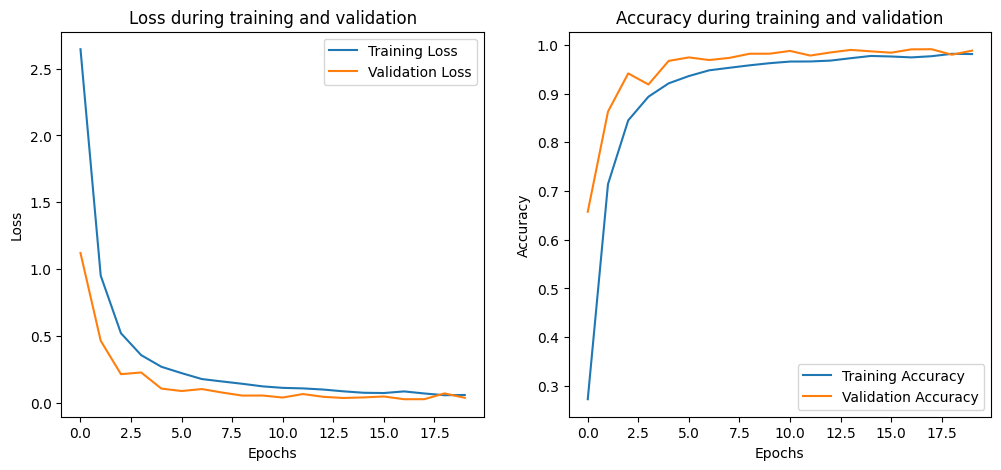

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9863 - loss: 0.0460
Loss: 0.04362724721431732
Accuracy: 0.986993134021759
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


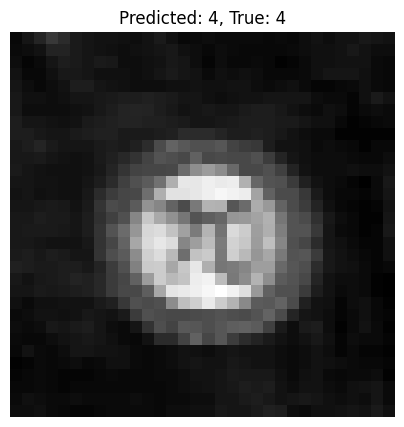

In [11]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir la ruta del dataset
train_dir = 'datasets/gtsrb/Train'

# Función para cargar y preprocesar una imagen
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error al cargar la imagen: {image_path}")
        return None
    image = cv2.resize(image, (32, 32))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image / 255.0
    return image

# Función para preprocesar el dataset
def preprocess_dataset(dataset_dir):
    images = []
    labels = []
    for class_id in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, class_id)
        if not os.path.isdir(class_dir):
            continue
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = load_and_preprocess_image(image_path)
            if image is not None:
                images.append(image)
                labels.append(int(class_id))
    return np.array(images), np.array(labels)

# Preprocesar las imágenes
images, labels = preprocess_dataset(train_dir)
print(images.shape, labels.shape)

# Redimensionar las imágenes para añadir una dimensión de canal
images = images.reshape(images.shape[0], 32, 32, 1)

# Convertir las etiquetas a one-hot encoding
labels = to_categorical(labels, 43)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Definir el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(43, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Crear un generador de datos con aumento de datos
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Ajustar el generador de datos al conjunto de entrenamiento
datagen.fit(X_train)

# Entrenar el modelo con el generador de datos
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                    epochs=20, 
                    validation_data=(X_val, y_val))

# Guardar el modelo entrenado con aumento de datos
model.save('traffic_sign_model_augmented.h5')

# Graficar el loss y el accuracy durante el entrenamiento
plt.figure(figsize=(12, 5))

# Graficar el loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss during training and validation')
plt.legend()

# Graficar el accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy during training and validation')
plt.legend()

# Mostrar las gráficas
plt.show()

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Visualizar una imagen con su predicción
index = 0  # Puedes cambiar el índice para visualizar diferentes imágenes
image = X_test[index].reshape(32, 32)
true_label = true_classes[index]
predicted_label = predicted_classes[index]

# Mostrar la imagen junto con la predicción
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title(f'Predicted: {predicted_label}, True: {true_label}')
plt.axis('off')
plt.show()


Se puede observar que el modelo funciona correctamente y tiene buena precision. Se probo con 20 Epochs y podria decirse que a partir de la vuelta 17 existe riesgo de overfitting. 

# Exploracion Estadistica

Procederemos a mostrar algunas estadísticas del dataset, como el número de imágenes por clase, y la distribución de los datos. 

Total de imágenes: 39209
Total de clases: 43
    ClassID  Count
0         0    210
1         1   2220
2        10   2010
3        11   1320
4        12   2100
5        13   2160
6        14    780
7        15    630
8        16    420
9        17   1110
10       18   1200
11       19    210
12        2   2250
13       20    360
14       21    330
15       22    390
16       23    510
17       24    270
18       25   1500
19       26    600
20       27    240
21       28    540
22       29    270
23        3   1410
24       30    450
25       31    780
26       32    240
27       33    689
28       34    420
29       35   1200
30       36    390
31       37    210
32       38   2070
33       39    300
34        4   1980
35       40    360
36       41    240
37       42    240
38        5   1860
39        6    420
40        7   1440
41        8   1410
42        9   1470


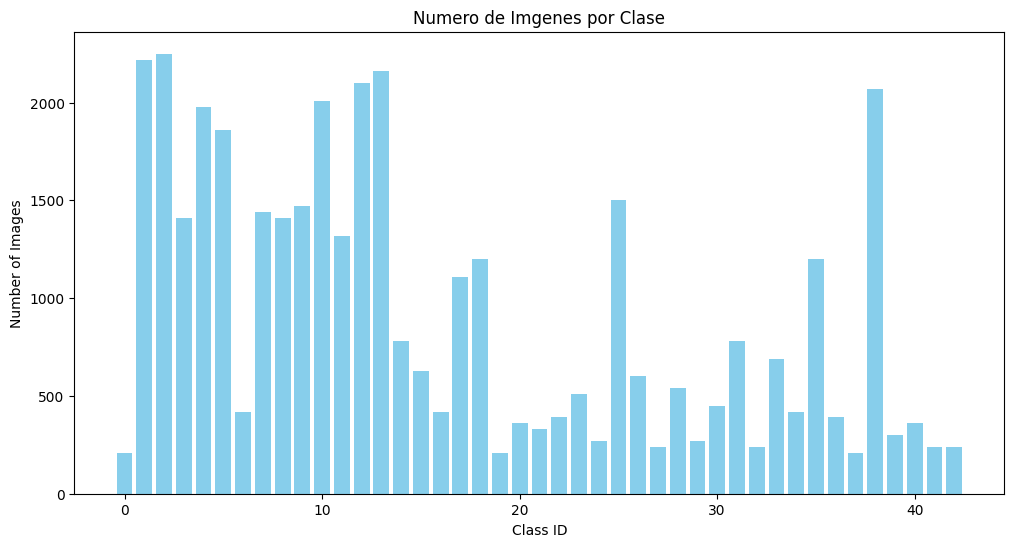

In [24]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir la ruta del dataset
train_dir = 'datasets/gtsrb/Train'

# Función para cargar y preprocesar una imagen
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error al cargar la imagen: {image_path}")
        return None
    image = cv2.resize(image, (32, 32))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image / 255.0
    return image

# Función para preprocesar el dataset y obtener estadísticas
def preprocess_and_analyze_dataset(dataset_dir):
    images = []
    labels = []
    class_counts = {}
    
    for class_id in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, class_id)
        if not os.path.isdir(class_dir):
            continue
        num_images = 0
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = load_and_preprocess_image(image_path)
            if image is not None:
                images.append(image)
                labels.append(int(class_id))
                num_images += 1
        class_counts[int(class_id)] = num_images
    
    return np.array(images), np.array(labels), class_counts

# Preprocesar las imágenes y obtener estadísticas
images, labels, class_counts = preprocess_and_analyze_dataset(train_dir)

# Mostrar estadísticas del dataset
print(f'Total de imágenes: {len(images)}')
print(f'Total de clases: {len(class_counts)}')

# Convertir las estadísticas a un DataFrame para una visualización más fácil
df_counts = pd.DataFrame(list(class_counts.items()), columns=['ClassID', 'Count'])

# Mostrar las estadísticas
print(df_counts)

# Graficar la distribución de clases
plt.figure(figsize=(12, 6))
plt.bar(df_counts['ClassID'], df_counts['Count'], color='skyblue')
plt.xlabel('Class ID')
plt.ylabel('Number of Images')
plt.title('Numero de Imgenes por Clase')
plt.show()


Imprimimos el total de imágenes y el total de clases, las guardamos en un directorio. Luego graficamos la cantidad de imagenes por clases para tener una visión mas amplia de los datos. 

1. Visualización de Muestras de Imágenes
Mostrar algunas imágenes de cada clase para tener una idea visual de los datos:

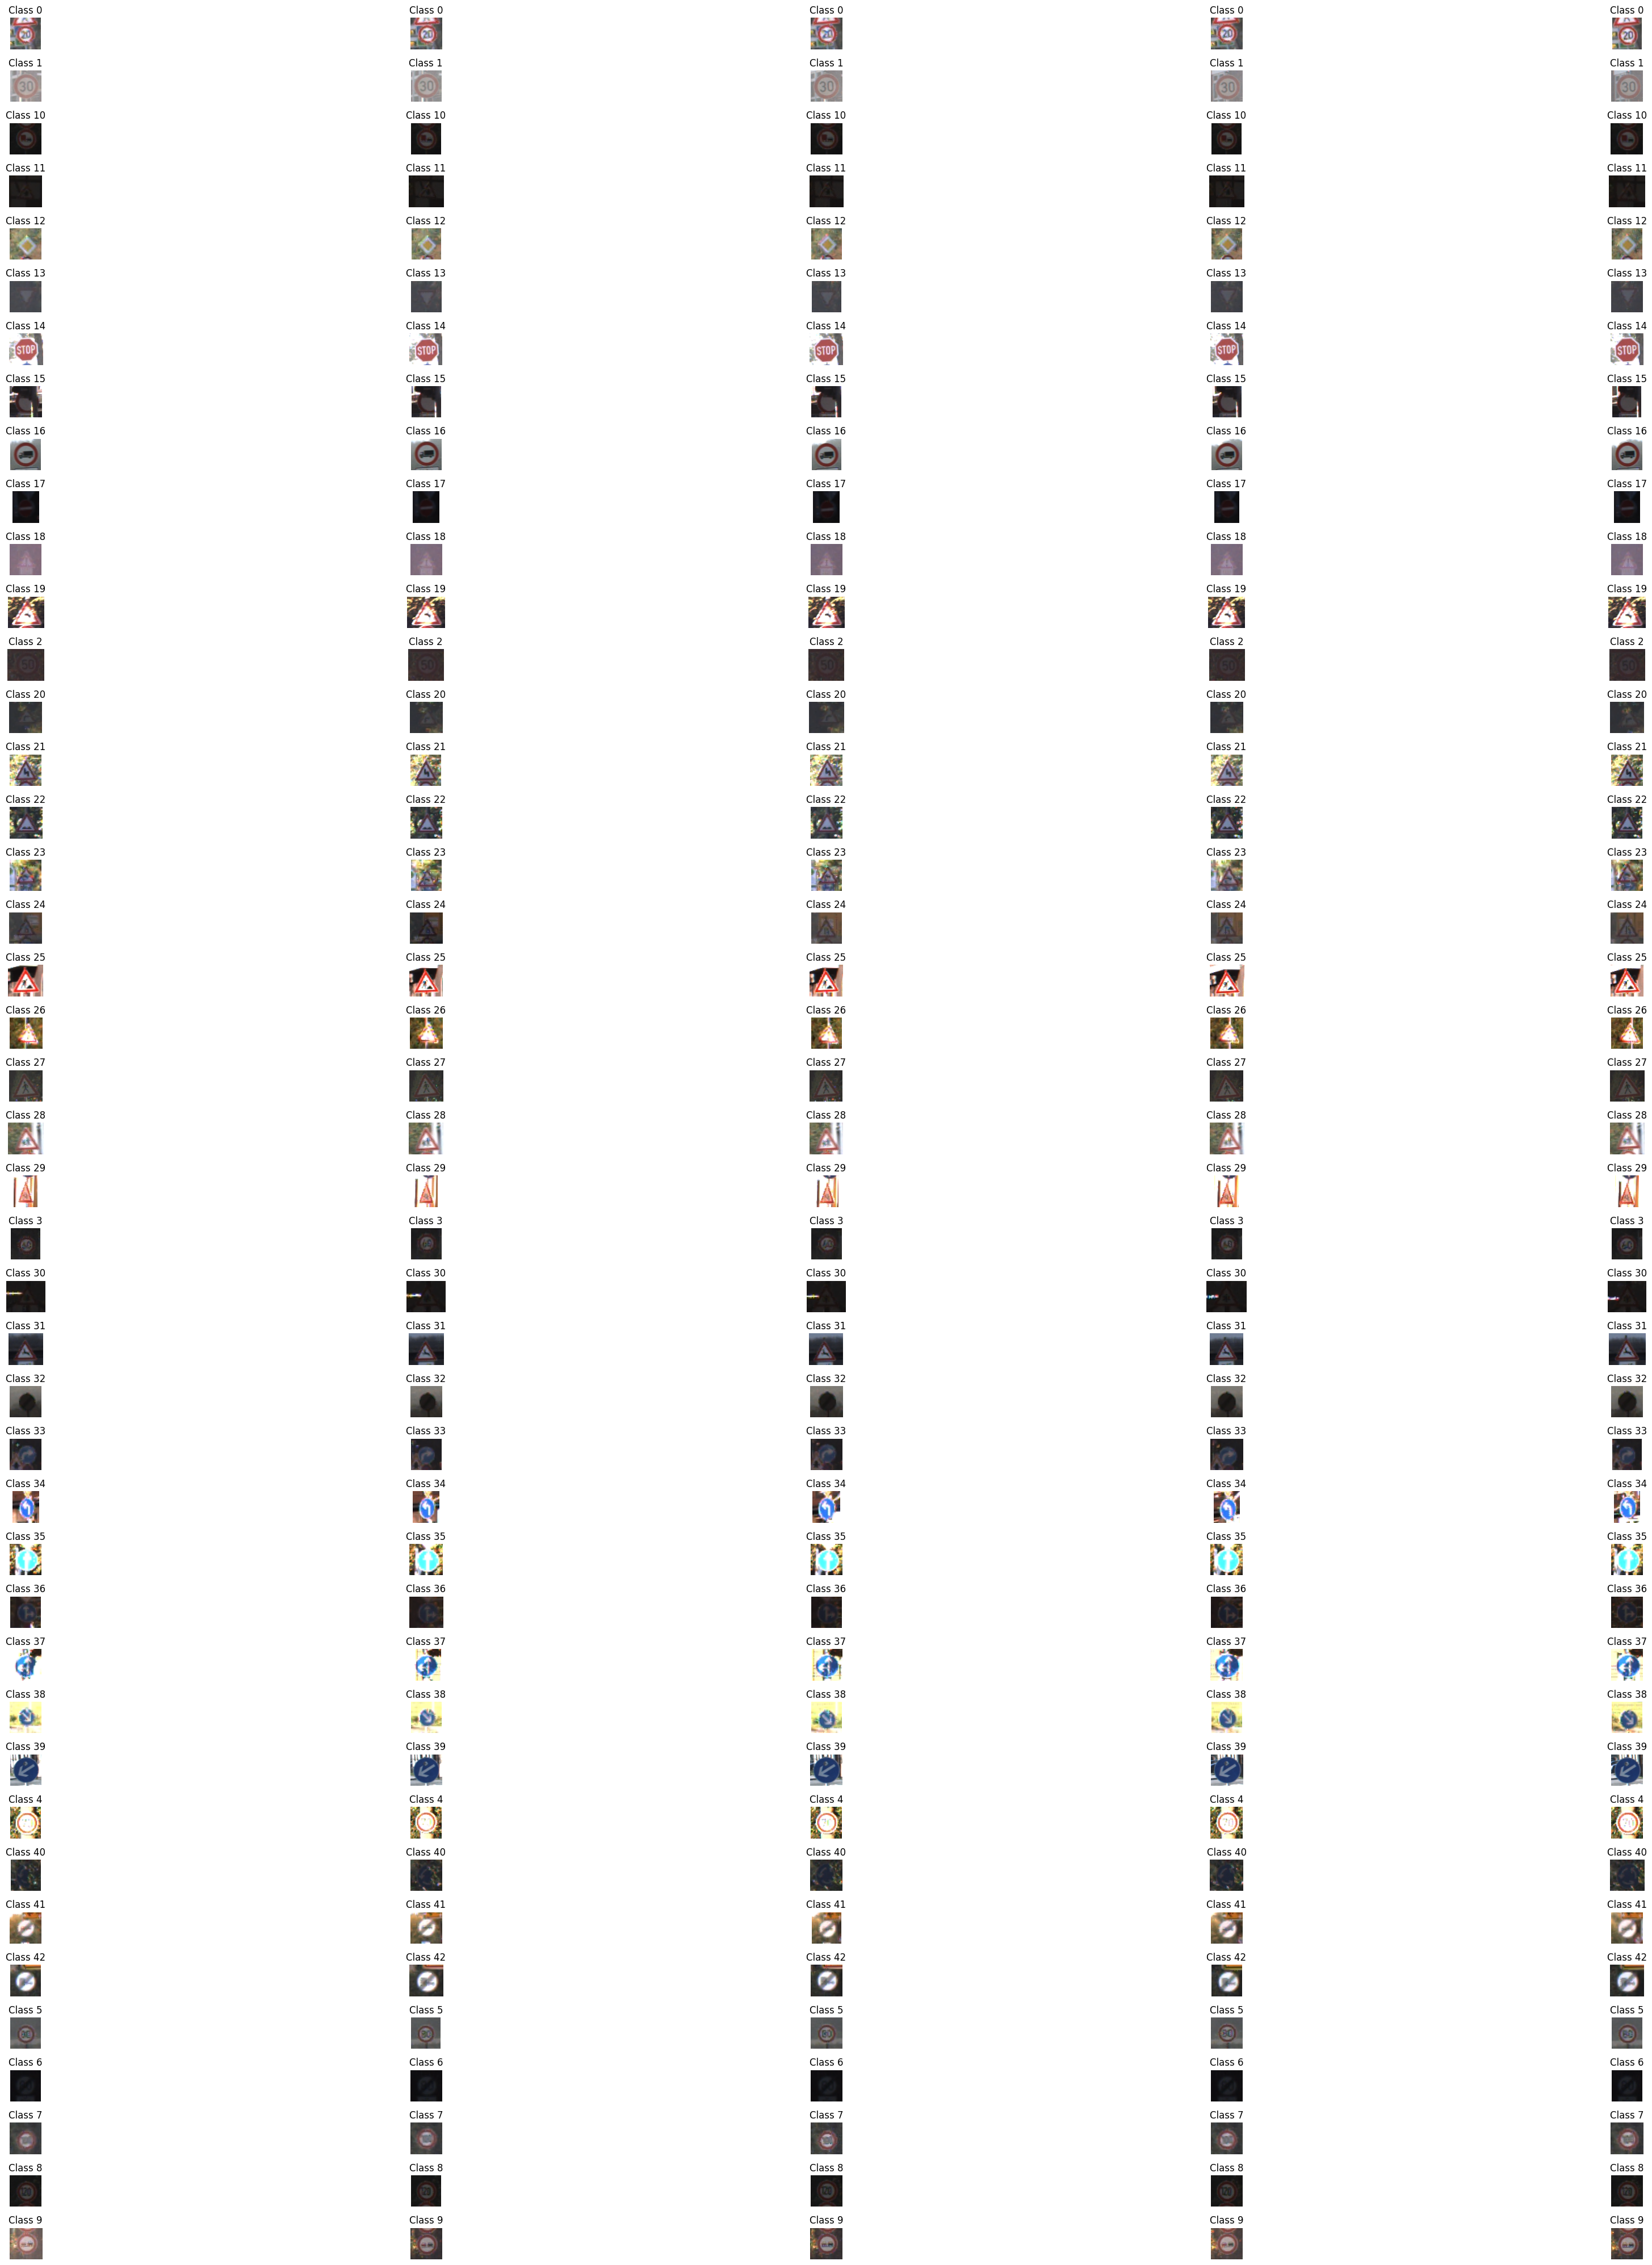

In [18]:
def show_sample_images(dataset_dir, num_samples=6):
    plt.figure(figsize=(40, 40))
    class_ids = os.listdir(dataset_dir)
    
    for i, class_id in enumerate(class_ids):
        class_dir = os.path.join(dataset_dir, class_id)
        if not os.path.isdir(class_dir):
            continue
        
        sample_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir)[:num_samples]]
        for j, img_path in enumerate(sample_images):
            img = cv2.imread(img_path)
            if img is not None:
                plt.subplot(len(class_ids), num_samples, i * num_samples + j + 1)
                plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                plt.title(f'Class {class_id}')
                plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Mostrar imágenes de muestra
show_sample_images(train_dir, num_samples=5)


2. Distribución de Imágenes por Clase con etiquetas de datos para cada clase.

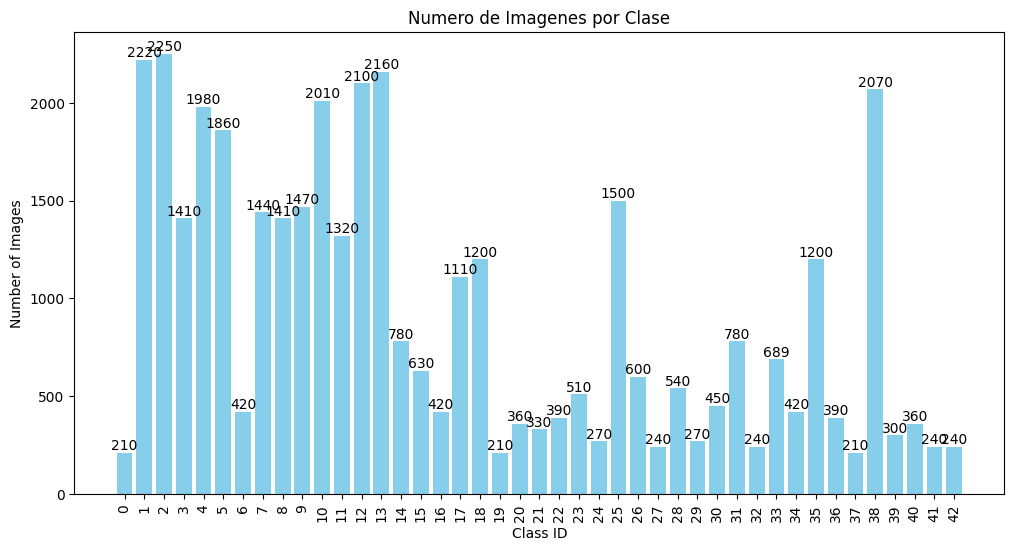

In [23]:
plt.figure(figsize=(12, 6))
bars = plt.bar(df_counts['ClassID'], df_counts['Count'], color='skyblue')
plt.xlabel('Class ID')
plt.ylabel('Number of Images')
plt.title('Numero de Imagenes por Clase')
plt.xticks(df_counts['ClassID'], rotation=90)
plt.bar_label(bars)
plt.show()



3. Histograma de Intensidades de Color
Generaramos un histograma para ver la distribución de los valores de píxeles (intensidades) de las imágenes en escala de grises.

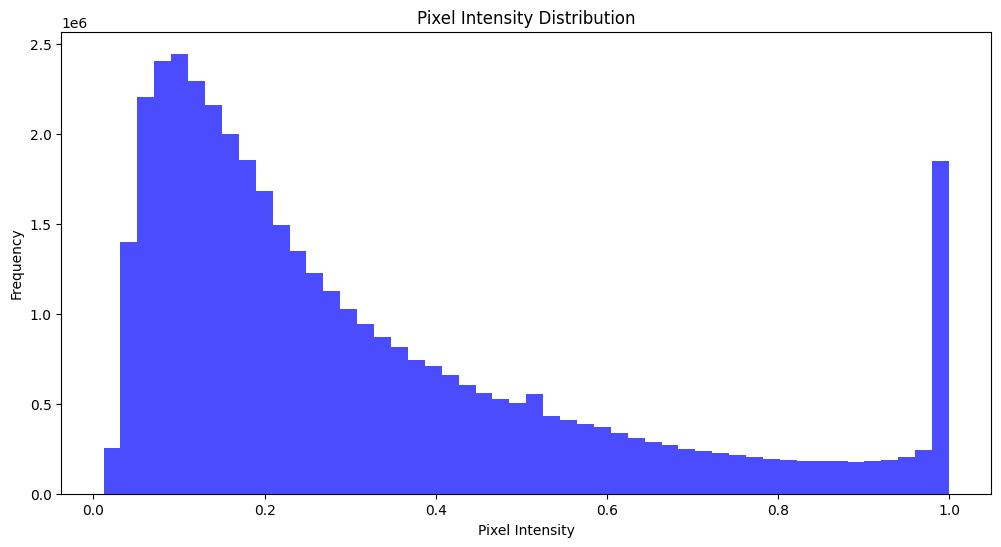

In [25]:
def plot_pixel_intensity_distribution(images):
    plt.figure(figsize=(12, 6))
    all_pixels = np.concatenate([img.flatten() for img in images])
    plt.hist(all_pixels, bins=50, color='blue', alpha=0.7)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Pixel Intensity Distribution')
    plt.show()

# Plot pixel intensity distribution
plot_pixel_intensity_distribution(images)


5. Gráfico de T-SNE
Usamos este tipo de tecnica para visualizar la distribución de las imágenes en un espacio de menor dimensión.

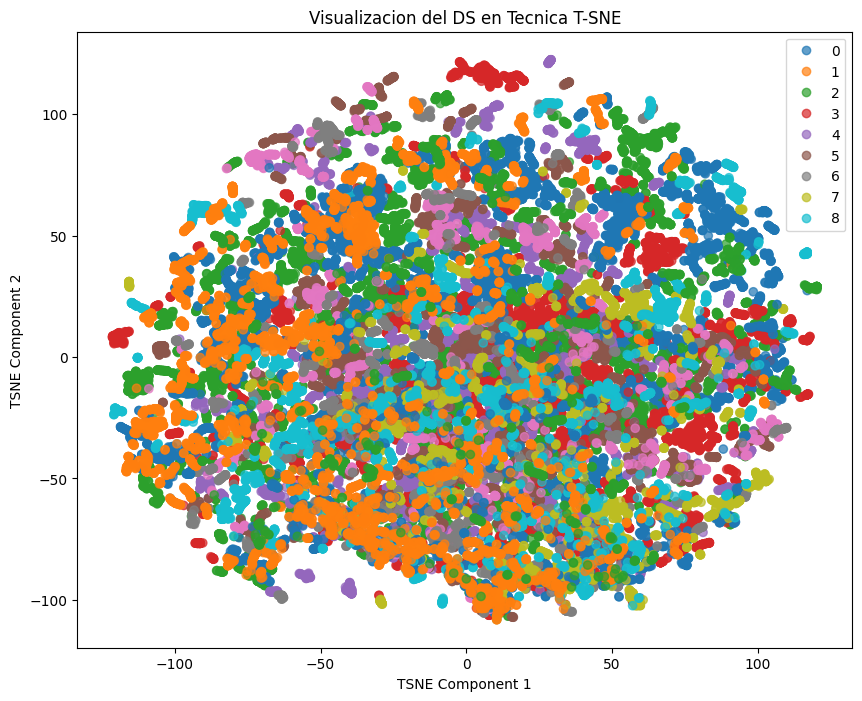

In [27]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Usar PCA para reducir dimensiones
pca = PCA(n_components=50).fit_transform(images.reshape(images.shape[0], -1))

# Usar T-SNE para reducir dimensiones a 2D para visualización
tsne = TSNE(n_components=2).fit_transform(pca)

# Graficar T-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne[:, 0], tsne[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=sorted(np.unique(labels)))
plt.title('Visualizacion del DS en Tecnica T-SNE')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()


Como podemos observar, no funciona correctamente ya que las clases estan mezcladas. Puede ser por la falta de calidad en los datos o porque las clases tiene caracteristicas similares.
Procederemos a ajustar los parametros como perplexity y learning rate para optimizarlo. 

Antes, normalizamos para ayudar al algoritmo. 

In [28]:
# Normalizar imágenes
images = images / 255.0


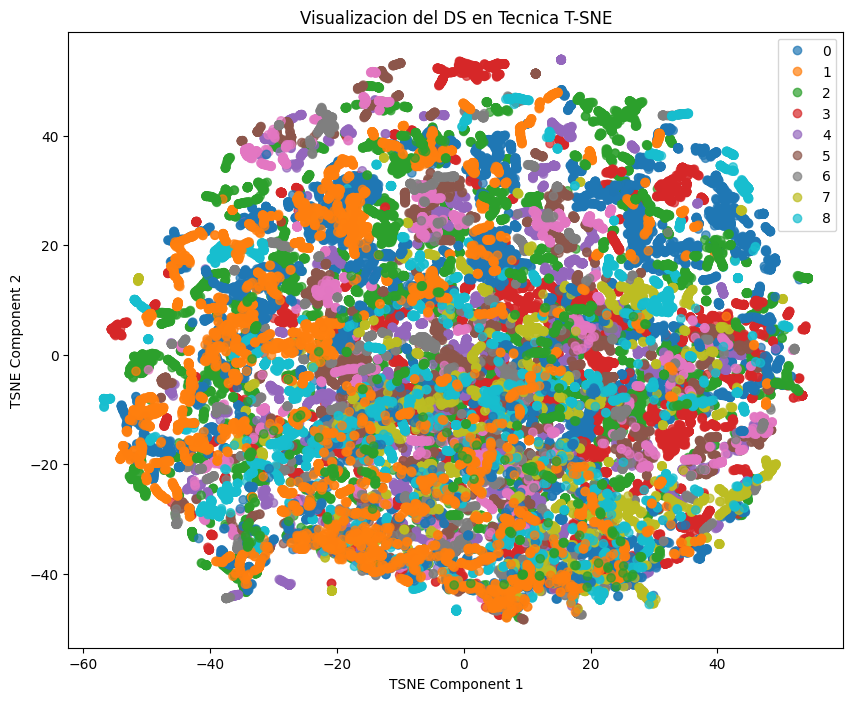

In [29]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Usar PCA para reducir dimensiones
pca = PCA(n_components=50).fit_transform(images.reshape(images.shape[0], -1))

# Usar T-SNE para reducir dimensiones a 2D para visualización
tsne = TSNE(n_components=2, perplexity=40, learning_rate=100).fit_transform(pca)


# Graficar T-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne[:, 0], tsne[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=sorted(np.unique(labels)))
plt.title('Visualizacion del DS en Tecnica T-SNE')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()